# 3.7 Бонусный урок - трюки в Pandas

In [2]:
import pandas as pd
import numpy as np

# Задача

In [ ]:
Расставьте способы взять среднее значение по скорости выполнения сверху вниз - наверху самый быстрый.

Пример датасэта для тестирования - 'iris.csv'

При использовании jupyter notebook можно оттестировать скорость выполнения кода при 
помощи "магии" timeit, которая проведёт несколько прогонов кода и выдаст среднее значение

%%timeit
your_command
Если вы пользуетесь чем-то другим, воспользуйтесь библиотекой time

from time import time
before = time()
your_command
after = time()
print(after - before)

In [28]:
df = pd.read_csv('iris.csv')

In [6]:
%%timeit
df+1

159 µs ± 875 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
from time import time
before = time()
df+1
after = time()
print(after - before)

0.0016033649444580078


In [ ]:
# Это функции время выполнения которых надо оценить:

In [9]:
df.describe().loc['mean']

In [ ]:
df.apply(np.mean)

In [ ]:
df.apply('mean')

In [ ]:
df.mean(axis=0)

In [20]:
lst = ["df.describe().loc['mean']", "df.apply(np.mean)", "df.apply('mean')", "df.mean(axis=0)"]

In [58]:
from time import time

answer = {}
for i in range(len(lst)):
    before = time()
    eval(lst[i])
    after = time()
    t = after - before
    answer[str(lst[i])] = t

for k, w in sorted(answer.items(), key = lambda x: x[1]):
    print(k, w)
    

df.mean(axis=0) 0.0009765625
df.apply('mean') 0.0016639232635498047
df.apply(np.mean) 0.0030138492584228516
df.describe().loc['mean'] 0.02768850326538086


# Time Series (Временные ряды)

In [76]:
stock = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv', 
                    index_col = 'Date', # делаем индексом колонку 'Date'
                   parse_dates = True # распарсить даты (если этого не сделать, то даты не определяются как даты)
                   )

In [77]:
stock

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
...,...,...,...,...,...
2017-07-11,993.00,995.99,983.72,994.13,2982726
2017-07-12,1000.65,1008.55,998.10,1006.51,3608574
2017-07-13,1004.62,1006.88,995.90,1000.63,2880769


In [78]:
stock.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

In [87]:
stock['2010']

C:\Users\roman\AppData\Local\Temp\ipykernel_12784\4152735502.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  stock['2010']


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
...,...,...,...,...,...
2010-12-27,181.90,183.14,180.45,182.14,2249734
2010-12-28,182.10,182.77,181.05,181.09,1975718
2010-12-29,181.80,184.35,180.41,183.37,3122379


In [81]:
stock['2010-01-04':'2010-12-28']

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
...,...,...,...,...,...
2010-12-21,183.88,185.65,182.60,184.75,5112753
2010-12-22,185.00,185.45,184.11,184.76,2580840
2010-12-23,184.34,184.98,181.89,182.59,3359880


In [93]:
# resample позволяет изменить частоту показа точек во временном ряду
# в исходном stock имеем измерения за каждый день

# например можно сделать измерения за 1 неделю:
# stock.resample('1w').asfreq()

# # например можно сделать измерения за месяц:
# stock.resample('M').asfreq()

# # за год:
# stock.resample('Y').asfreq()

# # за каждые 6 часов:
stock.resample('6h').asfreq()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.90,7600543.0
2010-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 12:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 18:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-05 00:00:00,133.43,135.48,131.81,134.69,8856456.0
...,...,...,...,...,...
2017-07-16 00:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 06:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 12:00:00,NaN,NaN,NaN,NaN,NaN


In [97]:
# Также можно получить среднее за эти периоды:

# Например среднее за неделю:    
# stock.resample('1w').mean()

# Например среднее за месяц:    
# stock.resample('M').mean()

# Например среднее за год:    
stock.resample('Y').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-12-31,138.971036,140.926853,137.019761,139.169602,7.288140e+06
2011-12-31,196.658413,199.444762,193.525516,196.663849,5.810698e+06
2012-12-31,220.011040,222.679440,217.588840,220.303680,4.200934e+06
2013-12-31,297.866270,300.925913,294.656587,298.032222,2.969756e+06
2014-12-31,332.799841,336.317460,328.545476,332.550913,4.088199e+06
2015-12-31,478.123532,483.248452,472.881905,478.138294,3.786690e+06
2016-12-31,699.756587,705.799127,692.646071,699.523135,4.103240e+06
2017-12-31,900.935259,906.482370,894.366593,901.238963,3.558034e+06


In [109]:
# получение агрегированных данных в скользящем окне.

# задаем размер окна и проходим им по всем данным:

# здесь получаем среднее из первых трех строк и далее из 2,3,4 строки и далее 
# stock.rolling(3).mean()

# также сдесь но уже по агрегированным данным:
# stock.resample('Y').mean().rolling(3).mean()

# здесь первые строки пустые, потому что перед ними нет данных для агрегации,
# этого можно избежать задав параметр: min_periods = 1
stock.resample('Y').mean().rolling(3, min_periods = 1).mean() # для первой строи используется только одна строка вместо трех

,Open,High,Low,Close,Volume
Date,,,,,
2010-12-31,138.971036,140.926853,137.019761,139.169602,7.288140e+06
2011-12-31,167.814724,170.185807,165.272638,167.916725,6.549419e+06
2012-12-31,185.213496,187.683685,182.711372,185.379044,5.766591e+06
2013-12-31,238.178574,241.016705,235.256981,238.333250,4.327129e+06
2014-12-31,283.559050,286.640938,280.263634,283.628938,3.752963e+06
2015-12-31,369.596548,373.497275,365.361323,369.573810,3.614882e+06
2016-12-31,503.559987,508.455013,498.024484,503.404114,3.992710e+06
2017-12-31,692.938459,698.509983,686.631523,692.966797,3.815988e+06


In [118]:
# можно считать среднее для первой строки
# затем для второй - это будет среднее между 1 и 2
# затем для третей - это будет среднее между 1, 2 и 3 и тд

# stock.expanding().mean()

# если задать значение для expanding - то получим окно в котором будет рассчитано такое среднее
stock.expanding(3).mean() # для первых трех строк - это значение третьей строки
# для четвертой строки - это значение 1 + 2 + 3, для пятой строки - значения 2 + 3 + 4 и т.д

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


In [113]:
# можно считать среднее с разными весами
# так значение текущей строки будет иметь максимальный вес, 
# а ближайшие к ней строки будут рассчитаны с угасающими весами

stock.ewm(alpha = 0.5).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.370000,135.856667,132.253333,134.426667,8.437818e+06
2010-01-06,134.501429,135.212857,131.908571,133.182857,7.719623e+06
2010-01-07,133.172667,133.670000,130.250667,131.485333,9.485224e+06
2010-01-08,131.824194,133.675161,129.620645,132.535484,9.665149e+06
...,...,...,...,...,...
2017-07-11,984.824247,992.398963,978.673783,989.343007,3.129116e+06
2017-07-12,992.737123,1000.474481,988.386892,997.926503,3.368845e+06
2017-07-13,998.678562,1003.677241,992.143446,999.278252,3.124807e+06


# Сглаживание кривых

<Axes: xlabel='Date'>

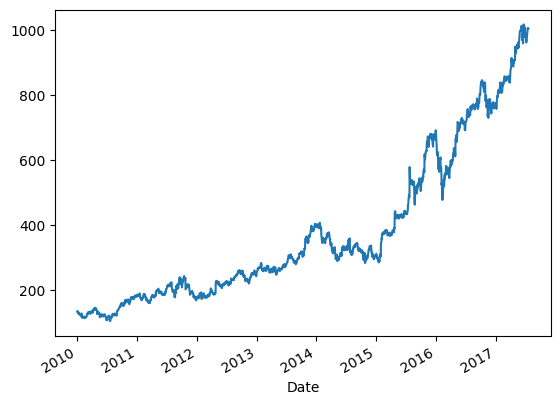

In [119]:
stock['Open'].plot()

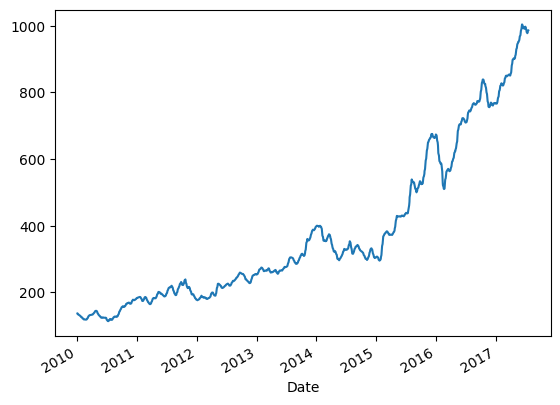

In [122]:
# возьмем эту колонку и применем к ней скользящее окно размером 10 и усреднимся по нему:

ns = stock['Open'].rolling(10, min_periods = 1).mean().plot()

<Axes: xlabel='Date'>

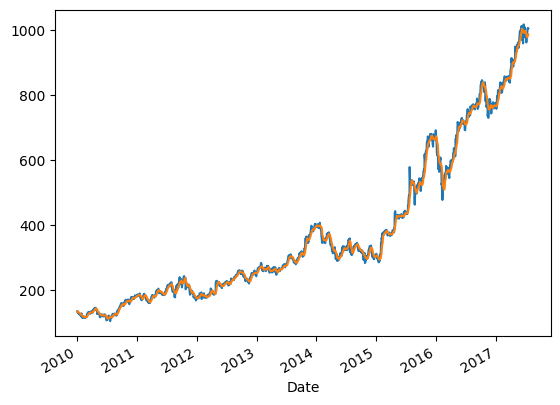

In [123]:
stock['Open'].plot()
stock['Open'].rolling(10, min_periods = 1).mean().plot()

# Задача

In [ ]:
# К вам попали наблюдения о числе перелетающих на зимовку стрижей, 
# представленные в виде пандасовской серии wintering. 
# В каждой ячейке указано число пролетевших птиц за этот день. 
# Посчитайте с помощью expanding окна количество всех перелетевших птиц 
# за всё время до данного и поместите в переменную total_birds.

Отвратительная формулировка задания.

Подсказки для тех, кто не понимает, что от него требуется:
    
1. Кроме строчки "import pandas as pd" в решении нужна всего одна строчка.
2. В total_birds помещается не число, а вся DataSeries, с применённым expanding.

In [ ]:
# wintering
# total_birds = wintering.expanding().sum()

# Обращаемся к TimeSeries по дням

In [131]:
# получаем номер дня недели
stock.index.weekday

Int64Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
            ...
            0, 2, 3, 4, 0, 1, 2, 3, 4, 0],
           dtype='int64', name='Date', length=1896)

In [133]:
# получаем название дня недели
stock.index.day_name()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Monday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=1896)

In [135]:
# теперь можно посчитать количество дней в датасете
stock.index.day_name().value_counts()

Wednesday    390
Tuesday      389
Thursday     382
Friday       380
Monday       355
Name: Date, dtype: int64

In [146]:
# можно посмотреть номер дня в году или номер недели
stock.index.weekofyear
# stock.index.weekofyear

C:\Users\roman\AppData\Local\Temp\ipykernel_12784\3198781543.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  stock.index.weekofyear


Int64Index([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
            ...
            27, 27, 27, 27, 28, 28, 28, 28, 28, 29],
           dtype='int64', name='Date', length=1896)